# Data Preparation

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Dibimbing/StudentsPerformance.csv')

i took this data from kaggle, this is the url for my data retrieval : 

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

From the parental education data, we can see that the most parental education is 'some collage'

In [16]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

## Checking Duplicate Row and Missing Value

In this section we checking is there are duplicate row and missing value or not

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

After we checking there is no missing value or duplicate row from this dataset then we can go to nex step

## Groupby

In this section we can groupby the dataset to make data more easy to understand

In [8]:
pd.set_option('max_rows', None)

In [9]:
df.groupby(['parental level of education'])

In [10]:
df.groupby(['parental level of education']).mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


from this data we know that the higgest mean math score, reading score, and writting score parental level of education is master's degree. meanwhile for the lowest mean math score, reading score, and writting score parental level of education is high school 

In [14]:
df.groupby(['test preparation course']).mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


From this data we know that the student taking test preparation course has more higgest score mean than the student who didn't take the test prepartion

# Statistical Sumary

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
categoricals = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numericals = ['math score', 'reading score', 'writing score']

In [21]:
df[numericals].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


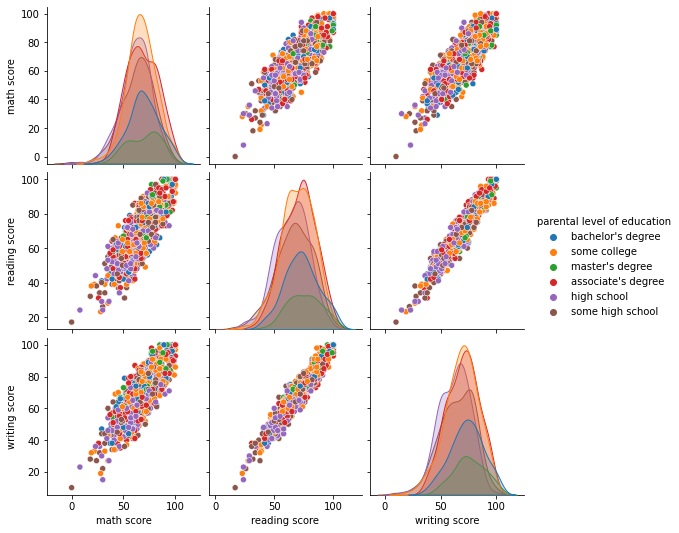

In [22]:
sns.pairplot(df, hue='parental level of education')

In this section have different result with groupby section, in this section we can see for the higgest math score is from parental level of education some collage

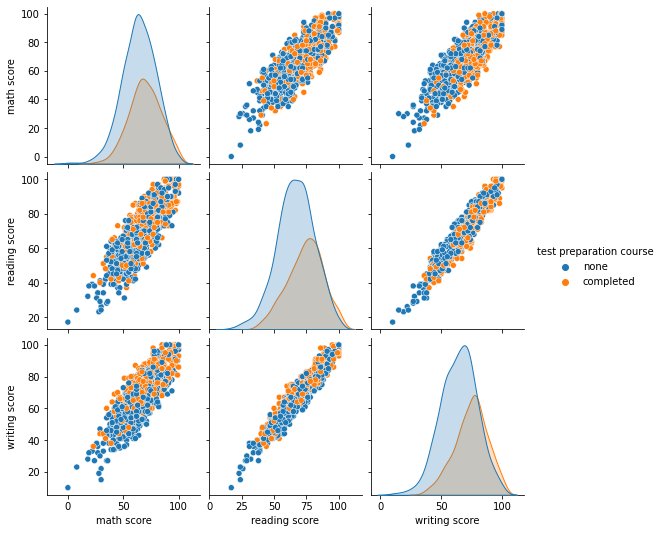

In [23]:
sns.pairplot(df, hue='test preparation course')

In this section have different result with groupby section, in this section we can see for the higgest score of math writting and reading is form the student who didnt take the test preparation course

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

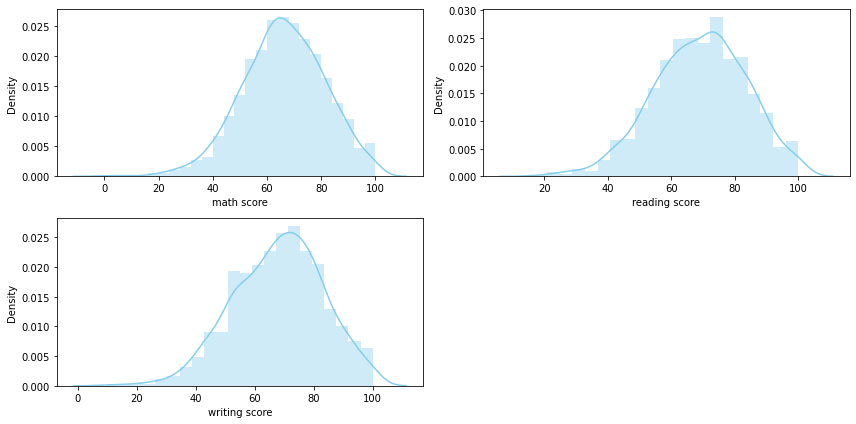

In [25]:
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

in this section we can see that the mode of match score is 60 until 70

for reading score is 76 until 78 

and for writting score is from 75 until 77



# Conclusion

From the dataset we know : 
1. The higgest mean of math score, writting score, and reading score is from parental level of education master's degree is mean that the higger parental level of education affect to their children lesson score
2. The higgest mean of math score, writting score, and reading score is from the student who take the test preparation test, is mean that test preparation test is affect to studdent lesson score
3. - We can see that the mode of match score is 60 until 70
   - for reading score is 76 until 78 
   -for writting score is from 75 until 77